In [1]:
from src.util.io import load_sampled_fccs, load_reference_fccs

sampled_fcc_komkova = load_sampled_fccs('../../../data/mc/mc_komkova.mat')
ref_fcc_komkova = load_reference_fccs('../../../data/fcc/ref_fccs_komkova.txt')

sampled_fcc_shestov = load_sampled_fccs('../../../data/mc/mc_shestov.mat')
ref_fcc_shestov = load_reference_fccs('../../../data/fcc/ref_fcc_shestov.txt')


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def reject_outliers(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return data[np.logical_and(data >= lower, data <= upper)]


def plot_violin_distribution(sampled_fcc: np.ndarray, ref_fcc: np.ndarray, causes: list[str]):
    sns.set_style("whitegrid")

    fig = plt.figure(figsize=(5.4, 1.7), dpi=312)

    temp = []
    for i, rxn in enumerate(causes):
        temp.append(reject_outliers(sampled_fcc[i, :]))

    df = pd.DataFrame(data=temp).transpose()
    lw = 0.5
    violin = sns.violinplot(data=df, density_norm='width', linewidth=lw)

    xticks = violin.get_xticks()
    for xtick in xticks:
        value = ref_fcc[xtick]
        plt.hlines(y=value, xmin=xtick - 0.05, xmax=xtick + 0.05, color='r', lw=lw)

    violin.set_xticks(xticks, causes)
    plt.xticks(rotation=45)
    return fig



In [3]:
import numpy as np

lact_index = ref_fcc_komkova.index.get_loc('LACT')
glct_index = ref_fcc_komkova.index.get_loc('GLCT')
sampled_response_of_we = np.apply_along_axis(lambda row: row[lact_index] - row[glct_index], 0, sampled_fcc_komkova)
response_of_we = np.apply_along_axis(lambda row: row[lact_index] - row[glct_index], 0, ref_fcc_komkova.to_numpy())
response_of_we

array([-1.228950e-02, -1.673360e-02, -4.966000e-04,  4.803000e-03,
       -2.290460e-03, -9.715800e-04, -1.660000e-02,  9.229800e-03,
        4.362200e-03,  1.606460e-03,  3.387800e-02,  1.714520e-02,
        8.291500e-02, -1.113922e-01,  3.164418e-02, -1.247245e-02,
       -1.233850e-02,  6.001000e-08])

## Fig. S6 Control coefficients for the ratio v_LACT /v_GLCT in the GEM-embedded model

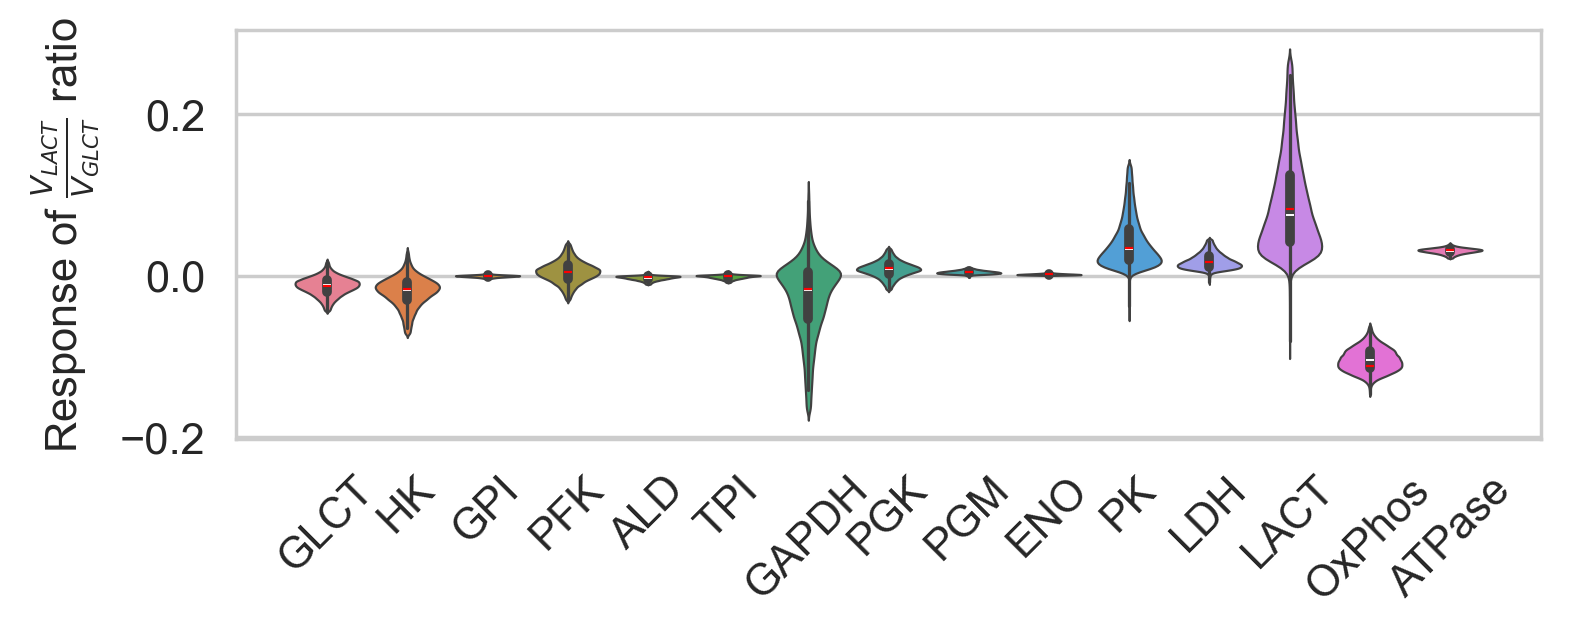

In [4]:
causes = ref_fcc_komkova.columns.drop(['AK', 'OXYT', 'Growth'])
columns = [index for (index, rxn_id) in enumerate(ref_fcc_komkova.index) if
           rxn_id not in ['AK', 'OXYT', 'Growth']]

plot_violin_distribution(sampled_response_of_we[columns, :], response_of_we[columns], causes)
plt.ylabel("Response of $\\frac{V_{LACT}}{V_{GLCT}}$ ratio")

path = '../../../out/response_in_we.png'
plt.savefig(path, bbox_inches='tight', pad_inches=0)
plt.show()
